## Import Packages and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
df = pd.read_csv('boston_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'boston_data.csv'

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
# Get the X,y
X = df[['RM','CRIM']]
y = df["MEDV"] 

## Pairplot

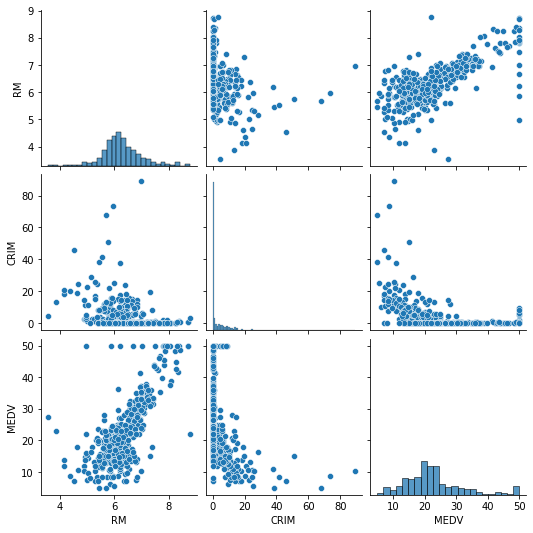

In [8]:
import seaborn as sns
sns.pairplot(pd.concat([X,y], axis=1))
plt.show()

In [9]:
X.head()

,RM,CRIM
0,6.575,0.00632
1,6.421,0.02731
2,7.185,0.02729
3,6.998,0.03237
4,7.147,0.06905


In [10]:
y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Fit the regression model

In [11]:
X = sm.add_constant(X) # again, this package needs to manually add an intercept (beta_0)
# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [12]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           5.22e-86
Time:                        08:32:21   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
RM             8.3911      0.405     20.726      0.000       7.596       9.186
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make prediction

In [14]:
# Make the prediction
predictions = model.predict(X)
# Print out the first 10 predicted values
print(predictions[:10])

0    25.924880
1    24.627095
2    31.037876
3    29.467401
4    30.707953
5    24.701942
6    21.178994
7    22.506661
8    17.949426
9    21.090208
dtype: float64


In [15]:
predictions

0      25.924880
1      24.627095
2      31.037876
3      29.467401
4      30.707953
         ...    
501    26.061002
502    22.096626
503    29.275277
504    27.735166
505    21.340863
Length: 506, dtype: float64

# Make some Plots

eval_env: 1


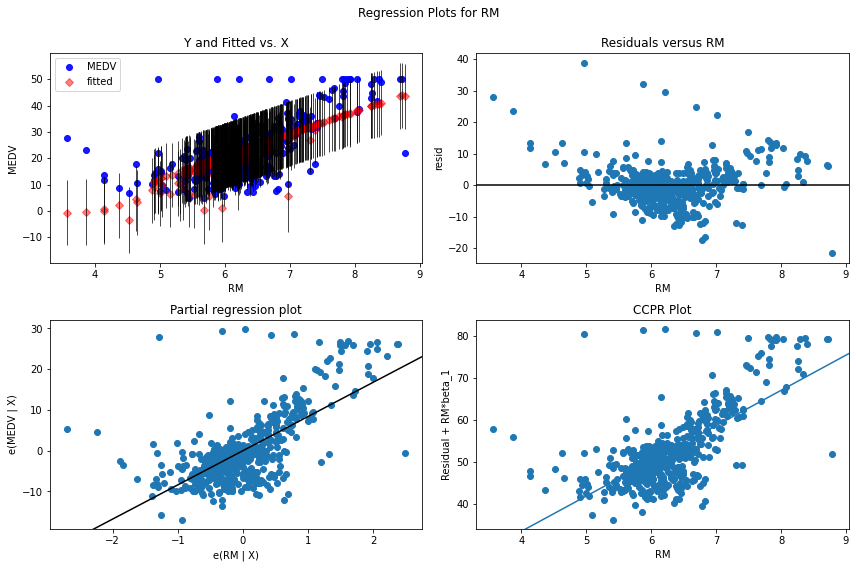

In [16]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'RM', fig=fig)
plt.show()

eval_env: 1


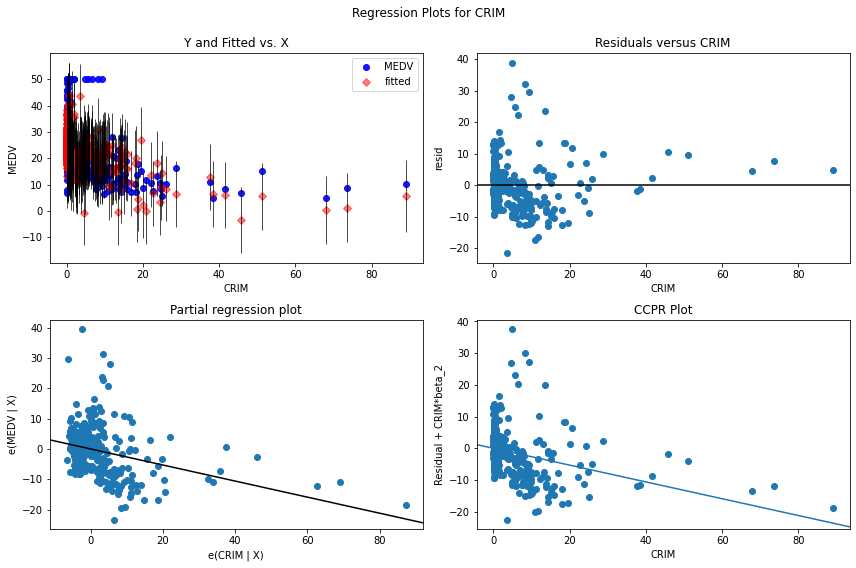

In [17]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'CRIM', fig=fig)
plt.show()

## Regression Plane for Multiple Linear Regression (p=2)

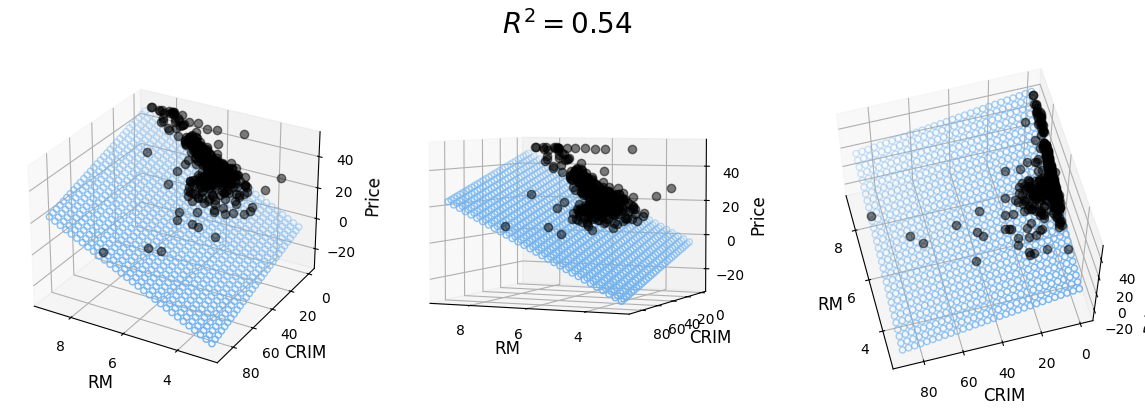

In [18]:
from mpl_toolkits.mplot3d import Axes3D
######################## Prepare model data point for visualization ###############################

x1_floor, x1_ceil = np.floor(np.array(X)[:,1]).min(), np.ceil(np.array(X)[:,1]).max()
x2_floor, x2_ceil = np.floor(np.array(X)[:,2]).min(), np.ceil(np.array(X)[:,2]).max()
                                                    
x1_pred = np.linspace(x1_floor, x1_ceil, 30)   # range of porosity values
x2_pred = np.linspace(x2_floor, x2_ceil, 30)  # range of brittleness values
x11_pred, x22_pred = np.meshgrid(x1_pred, x2_pred)
model_viz = np.array([x11_pred.flatten(), x22_pred.flatten()]).T

################################################ Train #############################################
model_viz = sm.add_constant(model_viz)
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.rsquared

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(X.iloc[:,1], X.iloc[:,2], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x11_pred.flatten(), x22_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('RM', fontsize=12)
    ax.set_ylabel('CRIM', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# QQ plot

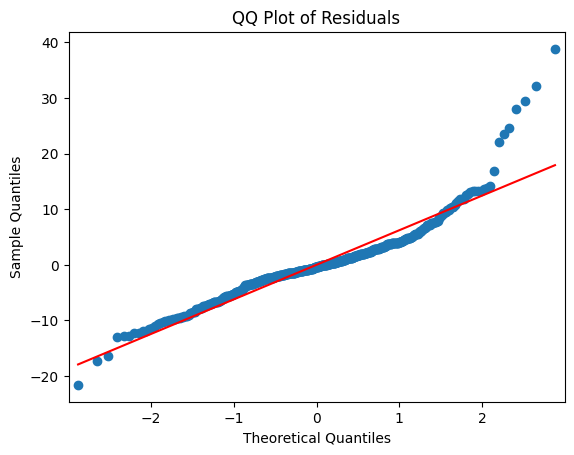

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# fit a linear regression model
model = sm.OLS(y, X).fit()

# extract the residuals
residuals = model.resid

# create a QQ plot of the residuals
fig = sm.graphics.qqplot(residuals, line='s')

# customize the plot
plt.title('QQ Plot of Residuals')
plt.show()

# Shapiro–Wilk test

In [22]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Fit linear regression model and get residuals
model = sm.OLS(y, X).fit()  # Fit linear regression
residuals = model.resid  # Get residuals

# Run Shapiro-Wilk test for normality of residuals
stat, p = shapiro(residuals)
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)
print('p-value is less than 0.05, so the residuals are not normally distributed')

Shapiro-Wilk test statistic: 0.9042773246765137
p-value: 2.728163421186053e-17
p-value is less than 0.05, so the residuals are not normally distributed


# Kolmogorov-Smirnov test

In [23]:
from scipy.stats import kstest
import statsmodels.api as sm

# Fit linear regression model and get residuals
model = sm.OLS(y, X).fit()  # Fit linear regression
residuals = model.resid  # Get residuals

# Run Kolmogorov-Smirnov test for normality of residuals
stat, p = kstest(residuals, 'norm')
print("Kolmogorov-Smirnov test statistic:", stat)
print("p-value:", p)
print('p-value is less than 0.05, so the residuals are not normally distributed')

Kolmogorov-Smirnov test statistic: 0.31928755323088986
p-value: 2.2221999224788944e-46
p-value is less than 0.05, so the residuals are not normally distributed
